# Projeto

## Circuito

![Circuito](img/circuito.jpg)

## Simulação

In [224]:
# Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [225]:
# Declarando variáveis 

R1 = R2 = 1.25
Rc= 440

L1 = L2 = L = 0

C1 = C2 = C = 0.1e-6

Ufonte = 2*9/math.pi

PossiveisK = np.linspace(0.1,1,10)
kFixo = 0.2

PossiveisFreq = np.arange(1e-3,100e3,500)

In [226]:
def CalcularTransformador(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

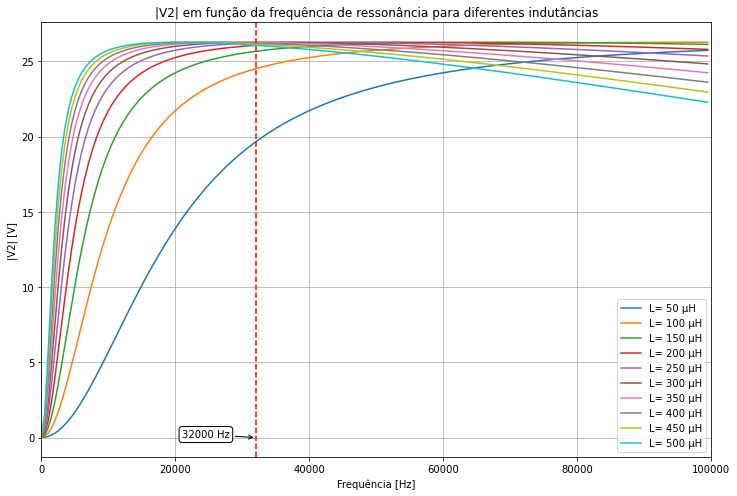

In [227]:
# |V2| para diferentes valores de f, considerando um coeficiente de acoplamento "k" fixo em 0.2
 
plt.figure(figsize=(12,8))

listaL = [50e-6, 100e-6, 150e-6, 200e-6, 250e-6, 300e-6, 350e-6, 400e-6, 450e-6, 500e-6]
listaV2total = []

for L in listaL:
    L1 = L2 = L
    listaV2 = []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        C1 = C2 = C = 1/((w**2)*L)
        i1, i2, ic , V2 = CalcularTransformador(kFixo, f)

        listaV2.append(abs(V2))

    listaV2total.append(listaV2)

    plt.plot(PossiveisFreq, listaV2, label=f'L= {L*1e6:.0f} µH')

plt.title("|V2| em função da frequência de ressonância para diferentes indutâncias")
plt.xlabel("Frequência [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
# Definindo faixa de frequências desejáveis
plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
plt.annotate(f'32000 Hz', (32000, 0), xytext=(32000-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))
plt.grid(True)
plt.legend()
plt.savefig('img/indutancias.png')
plt.show()

In [228]:
# Calculando a frquência de ressonância ideal (mínimo valor de diferença entre os valores de |V2| registrados para 8 indutâncias diferentes)

ldelta = []
n = 1

for i in range (n, len(PossiveisFreq)):
    listaLV2 = [listaV2total[0][i], listaV2total[1][i], listaV2total[2][i], listaV2total[3][i], listaV2total[4][i], listaV2total[5][i], listaV2total[6][i], listaV2total[7][i], listaV2total[8][i], listaV2total[9][i]]
    listaLV2.sort()
    listaLV2 = listaLV2[3:]
    maximo = max(listaLV2)
    minimo = min(listaLV2)
    ldelta.append(maximo-minimo)

for i in range (len(ldelta)):
    if ldelta[i] == min(ldelta):
        print(f'Frequência de ressonância ideal para minimização erros: {PossiveisFreq[i+n].round(2)} Hz') 


Frequência de ressonância ideal para minimização erros: 32000.0 Hz


In [229]:
L1 = L2 = L = 264e-6
C1 = C2 = C = 0.1e-6

freqRef = 1/(2*math.pi*math.sqrt(L1*C1))
print(f"Freq de referência: {freqRef:.2f} Hz")

Freq de referência: 30975.49 Hz


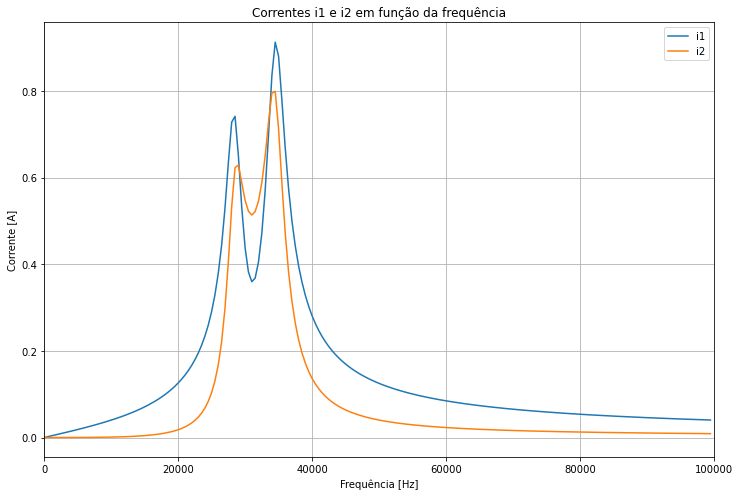

In [230]:
# i1 e i2 para diferentes vlores de f, considerando o coeficiente de acoplamento "k" fixo em 0.2
plt.figure(figsize=(12,8))

listaI1= []
listaI2= []

for f in PossiveisFreq:
    i1, i2, ic, V2 = CalcularTransformador(kFixo, f)

    listaI1.append(np.abs(i1)) 
    listaI2.append(np.abs(i2))

plt.plot(PossiveisFreq, listaI1, label=f'i1')
plt.plot(PossiveisFreq, listaI2, label=f'i2')   
plt.title("Correntes i1 e i2 em função da frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corrente [A]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.show()

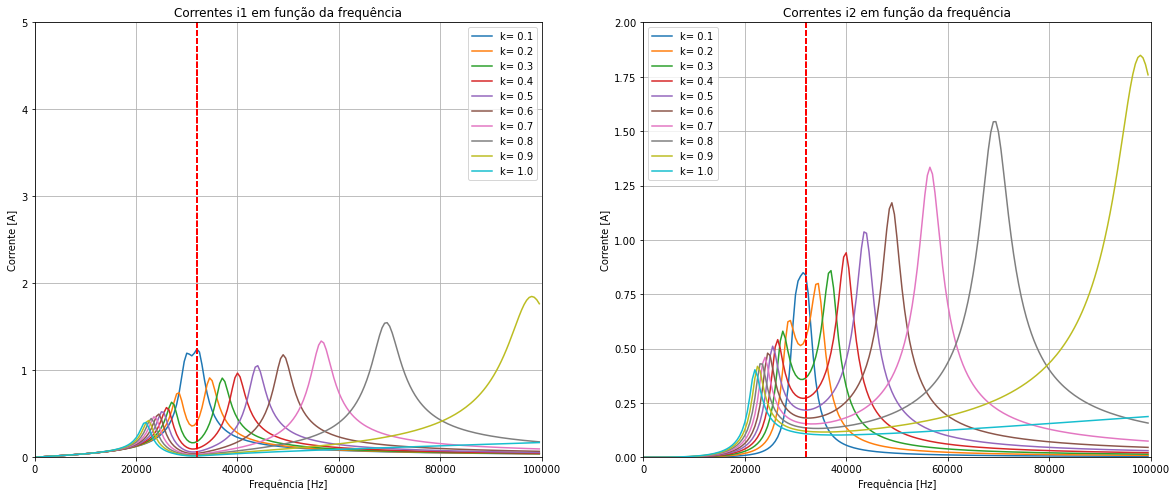

In [231]:
# i1 e i2 para diferentes valores de f, considerando um coeficiente de acoplamento "k" variável
plt.figure(figsize=(20,8))

for k in PossiveisK:
    listaI1= []
    listaI2= []
    for f in PossiveisFreq:
        i1, i2, ic, V2 = CalcularTransformador(k, f)

        listaI1.append(np.abs(i1))
        listaI2.append(np.abs(i2)) 

    plt.subplot(1,2,1)
    plt.plot(PossiveisFreq, listaI1, label=f'k= {np.round(k,3)}')
    plt.title("Correntes i1 em função da frequência")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Corrente [A]")
    plt.xlim(0,100e3)
    plt.ylim(0,5)
    plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
    plt.grid(True)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(PossiveisFreq, listaI2, label=f'k= {np.round(k,3)}')
    plt.title("Correntes i2 em função da frequência")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Corrente [A]")
    plt.xlim(0,100e3)
    plt.ylim(0,2)
    plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
    plt.grid(True)
    plt.legend()
    
plt.savefig('img/correntes.png')
plt.show()

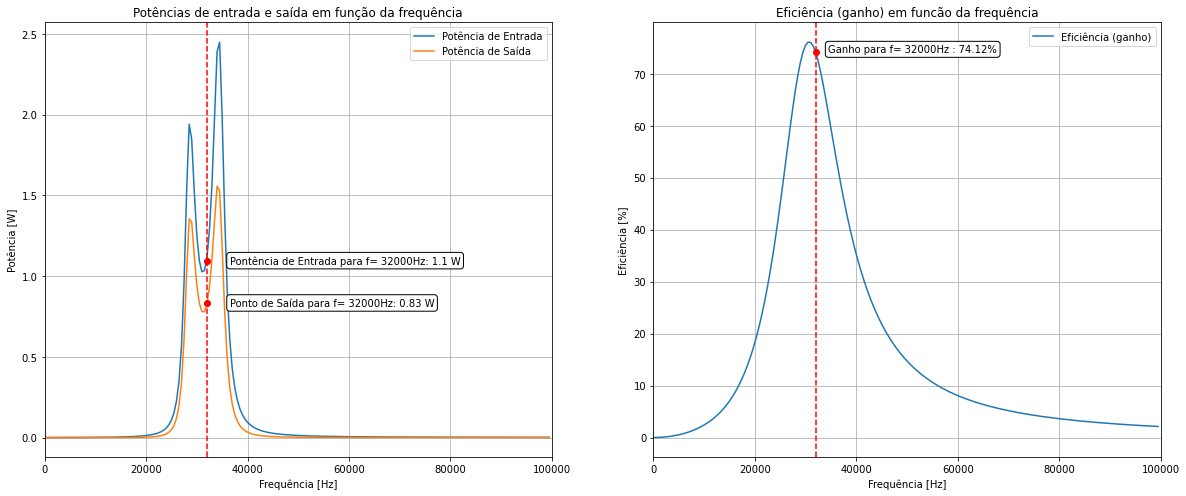

In [232]:

# Ganho, potência de entrada e potência de saída para diferentes valores de f, considerando um coeficiente de acoplamento "k" fixo em 0.2

plt.figure(figsize=(20,8))

PossiveisFreq = PossiveisFreq.tolist()
PossiveisFreq.append(32000)
PossiveisFreq.sort()

listaP_in = []
listaP_out = []
listaG = []

for f in PossiveisFreq:
    i1, i2, ic , V2 = CalcularTransformador(kFixo, f)
    P_in = Ufonte*i1.conjugate() / 2
    P_out = V2*i2.conjugate() / 2

    ganho = (P_out.real/P_in.real) * 100

    listaP_in.append(P_in.real)
    listaP_out.append(P_out.real)
    listaG.append(ganho)

fIdeal = 32000
gIdeal = listaG[PossiveisFreq.index(32000)]

P_in_fIdeal = listaP_in[listaG.index(max(listaG))]
P_out_fIdeal = listaP_out[listaG.index(max(listaG))]

plt.subplot(1,2,1)
plt.plot(PossiveisFreq, listaP_in, label='Potência de Entrada')
plt.plot(PossiveisFreq, listaP_out, label='Potência de Saída')
plt.title('Potências de entrada e saída em função da frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Potência [W]')
plt.xlim(0,100e3)
plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
plt.scatter(fIdeal, P_in_fIdeal, color='red', zorder=5)
plt.annotate(f'Pontência de Entrada para f= {round(fIdeal, 2)}Hz: {round(P_in_fIdeal, 2)} W', (fIdeal, P_in_fIdeal), xytext=(fIdeal+4500, P_in_fIdeal-0.02), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.scatter(fIdeal, P_out_fIdeal, color='red', zorder=5)
plt.annotate(f'Ponto de Saída para f= {round(fIdeal, 2)}Hz: {round(P_out_fIdeal, 2)} W', (fIdeal, P_out_fIdeal), xytext=(fIdeal+4500, P_out_fIdeal-0.02), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(PossiveisFreq, listaG, label='Eficiência (ganho)')
plt.title('Eficiência (ganho) em funcão da frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Eficiência [%]')
plt.xlim(0,100e3)
plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
plt.scatter(fIdeal, gIdeal, color='red', zorder=5)
plt.annotate(f'Ganho para f= {round(fIdeal, 2)}Hz : {round(gIdeal, 2)}%', (fIdeal, gIdeal), xytext=(fIdeal+2500, gIdeal), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

plt.savefig('img/pot_ganho.png')
plt.show()

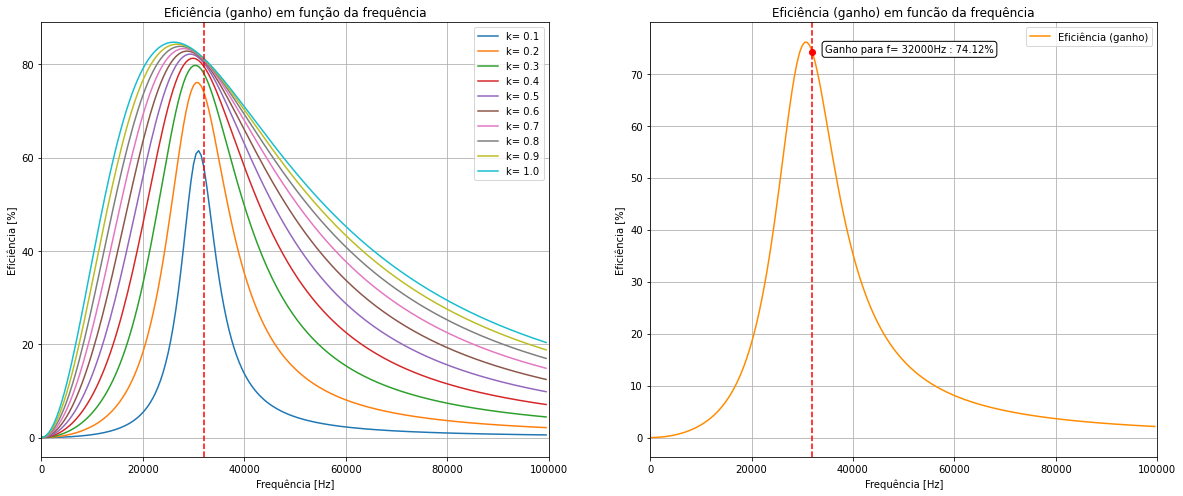

In [233]:
# Ganho para diferentes valores de f, considerando um coeficiente de acoplamento "k" variável

plt.figure(figsize=(20,8))

listaP_in = []
listaP_out = []
listaG = []

for f in PossiveisFreq:
    i1, i2, ic , V2 = CalcularTransformador(kFixo, f)
    P_in = Ufonte*i1.conjugate() / 2
    P_out = V2*i2.conjugate() / 2

    ganho = (P_out.real/P_in.real) * 100

    listaP_in.append(P_in.real)
    listaP_out.append(P_out.real)
    listaG.append(ganho)

plt.subplot(1,2,2)
plt.plot(PossiveisFreq, listaG, label='Eficiência (ganho)', color='darkorange')
plt.title('Eficiência (ganho) em funcão da frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Eficiência [%]')
plt.xlim(0,100e3)
plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
plt.scatter(fIdeal, gIdeal, color='red', zorder=5)
plt.annotate(f'Ganho para f= {round(fIdeal, 2)}Hz : {round(gIdeal, 2)}%', (fIdeal, gIdeal), xytext=(fIdeal+2500, gIdeal), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

fIdeal = 32000
gIdeal = listaG[PossiveisFreq.index(32000)]

listaP_in = []
listaP_out = []

for k in PossiveisK:
    listaG = []
    for f in PossiveisFreq:
        i1, i2, ic , V2 = CalcularTransformador(k, f)
        P_in = Ufonte*i1.conjugate() / 2
        P_out = V2*i2.conjugate() / 2

        ganho = (P_out.real/P_in.real) * 100

        listaP_in.append(P_in.real)
        listaP_out.append(P_out.real)
        listaG.append(ganho)

    plt.subplot(1,2,1)
    plt.plot(PossiveisFreq, listaG, label=f'k= {np.round(k,3)}')
    plt.legend()

plt.title("Eficiência (ganho) em função da frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Eficiência [%]")
plt.xlim(0,100e3)
plt.axvline(x=32000, ymin=0, ymax=1, c='r', ls='--')
plt.grid(True)
plt.savefig('img/ganhoK.png')
plt.show()

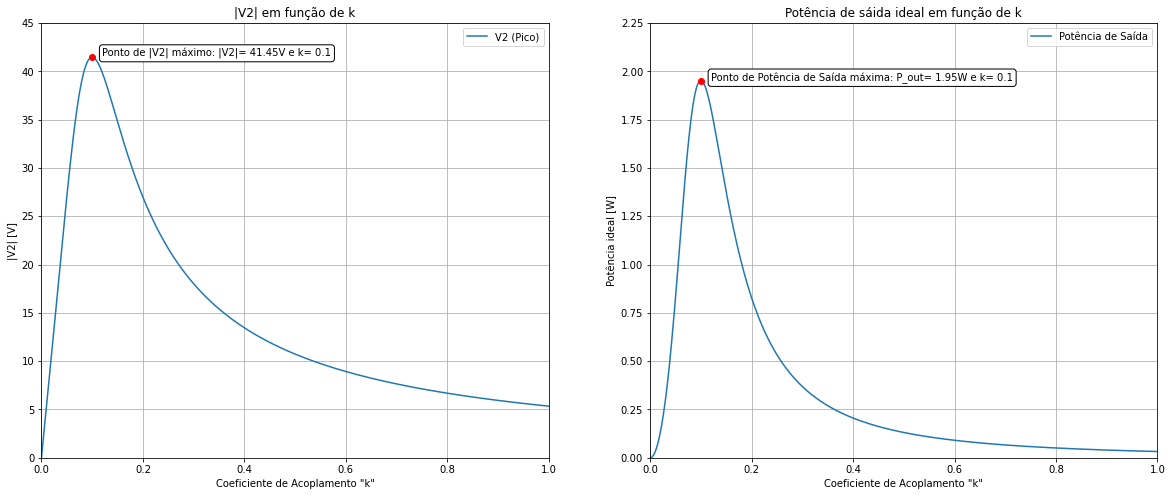

In [234]:
# |V2| para diferentes valores de f, considerando um coeficiente de acoplamento "k" variável

plt.figure(figsize=(20,8))

PossiveisK = np.linspace(0, 1, 500)
Rc = 440
f = 32000

listaV2 = []
listaP_out = []

for k in PossiveisK:
    i1, i2, ic , V2 = CalcularTransformador(k, f)
    P_out = V2*i2.conjugate() / 2

    listaV2.append(abs(V2))
    listaP_out.append(P_out.real)

maxV2 = np.max(listaV2)
kIdeal = PossiveisK[listaV2.index(maxV2)]

plt.subplot(1,2,1)
plt.plot(PossiveisK, listaV2, label='V2 (Pico)')
plt.title('|V2| em função de k')
plt.xlabel('Coeficiente de Acoplamento "k"')
plt.ylabel('|V2| [V]')
plt.xlim(0,1)
plt.ylim(0, 45)
plt.scatter(kIdeal, maxV2, color='red', zorder=5)
plt.annotate(f'Ponto de |V2| máximo: |V2|= {maxV2.round(2)}V e k= {kIdeal.round(2)}', (kIdeal, maxV2), xytext=(kIdeal+0.02, maxV2+0.1), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

maxP_out = np.max(listaP_out)
kIdealP_out = PossiveisK[listaP_out.index(maxP_out)]

plt.subplot(1,2,2)
plt.plot(PossiveisK, listaP_out, label='Potência de Saída')
plt.title('Potência de sáida ideal em função de k')
plt.xlabel('Coeficiente de Acoplamento "k"')
plt.ylabel('Potência ideal [W]')
plt.xlim(0,1)
plt.ylim(0, 2.25)
plt.scatter(kIdealP_out, maxP_out, color='red', zorder=5)
plt.annotate(f'Ponto de Potência de Saída máxima: P_out= {round(maxP_out, 2)}W e k= {round(kIdealP_out, 2)}', (kIdealP_out, maxP_out), xytext=(kIdealP_out+0.02, maxP_outIdeal), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

plt.savefig('img/V2_Pout.png')
plt.show()

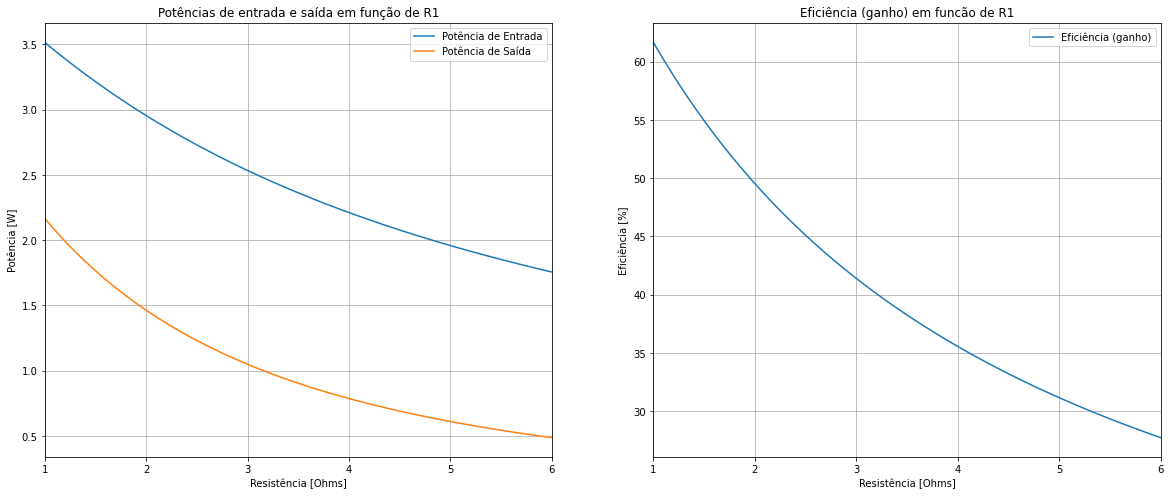

In [235]:
# Potência de entrada e potência de saída para diferentes vaores de R1, considerando um coeficiente de acoplamento "k" fixo em 0.1 

plt.figure(figsize=(20,8))

R1_values = np.linspace(1, 6, 100)
kFixo = 0.1

listaP_in = []
listaP_out = []
listaG = []

for R in R1_values:
    R1 = R
    i1, i2, ic, V2 = CalcularTransformador(kFixo, f)
    P_in = Ufonte * i1.conjugate() / 2
    P_out = V2 * i2.conjugate() / 2

    ganho = (P_out.real / P_in.real)*100

    listaP_in.append(P_in.real)
    listaP_out.append(P_out.real)
    listaG.append(ganho)

plt.subplot(1,2,1)
plt.plot(R1_values, listaP_in, label='Potência de Entrada')
plt.plot(R1_values, listaP_out, label='Potência de Saída')
plt.title('Potências de entrada e saída em função de R1')
plt.xlabel('Resistência [Ohms]')
plt.ylabel('Potência [W]')
plt.xlim(1,6)
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(R1_values, listaG, label='Eficiência (ganho)')
plt.title('Eficiência (ganho) em funcão de R1')
plt.xlabel('Resistência [Ohms]')
plt.ylabel('Eficiência [%]')
plt.xlim(1,6)
plt.grid(True)
plt.legend()

plt.savefig('img/R1eR2.png')
plt.show()

## Resultados do experimento

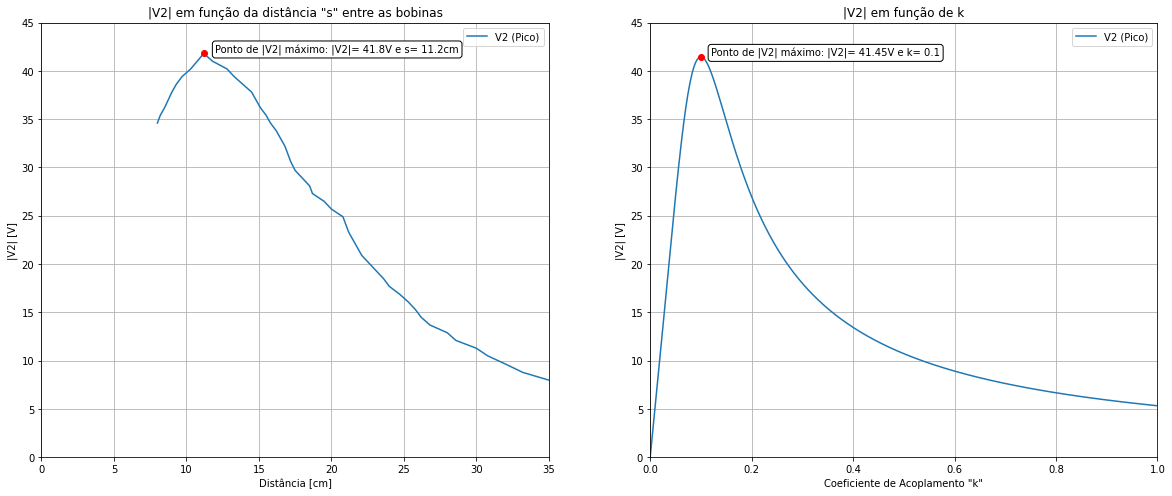

In [236]:
plt.figure(figsize=(20,8))

PossiveisK = np.linspace(0, 1, 500)
R1 = R2

listaV2ideal = []

for k in PossiveisK:
    i1, i2, ic , V2 = CalcularTransformador(k, f)
    listaV2ideal.append(abs(V2))

maxV2 = np.max(listaV2ideal)
kIdeal = PossiveisK[listaV2ideal.index(maxV2)]

plt.subplot(1,2,2)
plt.plot(PossiveisK, listaV2ideal, label='V2 (Pico)')
plt.title('|V2| em função de k')
plt.xlabel('Coeficiente de Acoplamento "k"')
plt.ylabel('|V2| [V]')
plt.xlim(0,1)
plt.ylim(0, 45)
plt.scatter(kIdeal, maxV2, color='red', zorder=5)
plt.annotate(f'Ponto de |V2| máximo: |V2|= {maxV2.round(2)}V e k= {kIdeal.round(2)}', (kIdeal, maxV2), xytext=(kIdeal+0.02, maxV2+0.1), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

listaV2real= [8, 8.8, 9.6, 10.5, 11.3, 12.1, 12.9, 13.7, 14.5, 15.3, 16.1, 16.9, 17.7, 18.5, 19.3, 20.1, 20.9, 21.7, 22.5, 23.3, 24.1, 24.9, 25.7, 26.5, 27.3, 28.1, 28.9, 29.7, 30.6, 31.4, 32.2, 33, 33.8, 34.6, 35.4, 36.2, 37, 37.8, 38.6, 39.4, 40.2, 41, 41.8, 40.2, 39.4, 38.6, 37.8, 36.2, 35.4, 34.6]
listaS = [35, 33.2, 32.1, 30.8, 30, 28.6, 28, 26.8, 26.2, 25.8, 25.3, 24.7, 24, 23.6, 23.1, 22.6, 22.1, 21.8, 21.5, 21.2, 21, 20.8, 20, 19.5, 18.7, 18.5, 18, 17.5, 17.2, 17, 16.8, 16.5, 16.2, 15.8, 15.5, 15.1, 14.8, 14.5, 13.9, 13.3, 12.8, 11.8, 11.2, 10.3, 9.7, 9.3, 9, 8.5, 8.2, 8]

maxV2 = np.max(listaV2real)
s_maxV2 = listaS[listaV2real.index(maxV2)]

plt.subplot(1,2,1)
plt.plot(listaS, listaV2real, label='V2 (Pico)')
plt.title('|V2| em função da distância "s" entre as bobinas')
plt.xlabel('Distância [cm]')
plt.ylabel('|V2| [V]')
plt.xlim(0, 35)
plt.ylim(0, 45)
plt.scatter(s_maxV2, maxV2, color='red', zorder=5)
plt.annotate(f'Ponto de |V2| máximo: |V2|= {round(maxV2, 2)}V e s= {round(s_maxV2, 2)}cm', (s_maxV2, maxV2), xytext=(s_maxV2+0.8, maxV2+0.1), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

plt.savefig('img/V2Real.png')
plt.show()

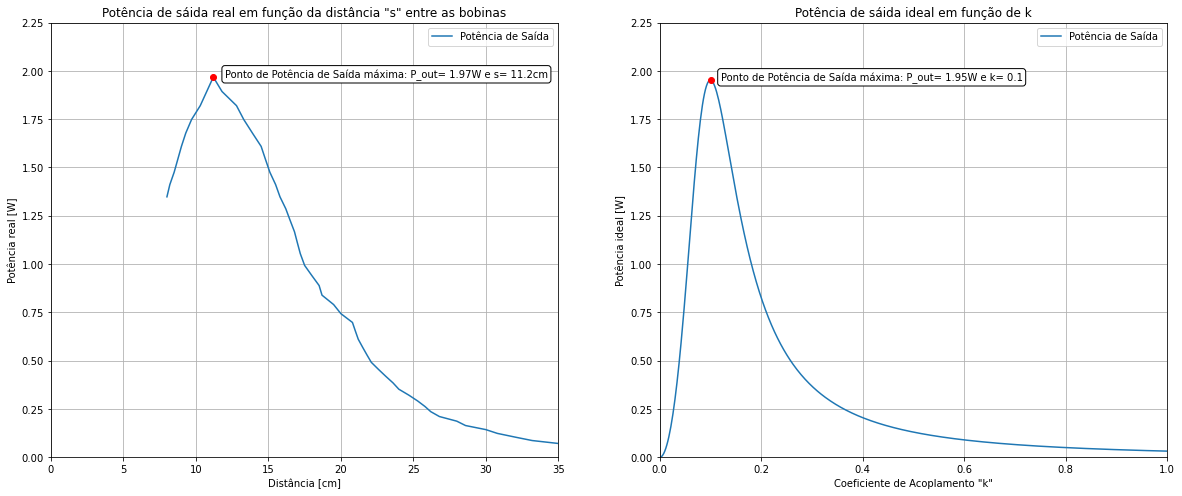

In [237]:
plt.figure(figsize=(20,8))

listaP_outIdeal = []

for k in PossiveisK:
    i1, i2, ic , V2 = CalcularTransformador(k, f)
    P_inIdeal = Ufonte*i1.conjugate() / 2
    P_outIdeal = V2*i2.conjugate() / 2

    listaP_outIdeal.append(P_outIdeal.real)

maxP_outIdeal = np.max(listaP_outIdeal)
kIdealP_out = PossiveisK[listaP_outIdeal.index(maxP_outIdeal)]

plt.subplot(1,2,2)
plt.plot(PossiveisK, listaP_outIdeal, label='Potência de Saída')
plt.title('Potência de sáida ideal em função de k')
plt.xlabel('Coeficiente de Acoplamento "k"')
plt.ylabel('Potência ideal [W]')
plt.xlim(0,1)
plt.ylim(0, 2.25)
plt.scatter(kIdealP_out, maxP_outIdeal, color='red', zorder=5)
plt.annotate(f'Ponto de Potência de Saída máxima: P_out= {round(maxP_outIdeal, 2)}W e k= {round(kIdealP_out, 2)}', (kIdealP_out, maxP_outIdeal), xytext=(kIdealP_out+0.02, maxP_outIdeal), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

Rc = 444
listaP_outReal = []

for V2real in listaV2real:
    P_outReal = ((V2real)**2)/(Rc*2)
    listaP_outReal.append(P_outReal)

maxP_outReal = np.max(listaP_outReal)
s_maxP_outReal = listaS[listaP_outReal.index(maxP_outReal)]

plt.subplot(1,2,1)
plt.plot(listaS, listaP_outReal, label='Potência de Saída')
plt.title('Potência de sáida real em função da distância "s" entre as bobinas')
plt.xlabel('Distância [cm]')
plt.ylabel('Potência real [W]')
plt.xlim(0, 35)
plt.ylim(0, 2.25)
plt.scatter(s_maxP_outReal, maxP_outReal, color='red', zorder=5)
plt.annotate(f'Ponto de Potência de Saída máxima: P_out= {round(maxP_outReal, 2)}W e s= {round(s_maxP_outReal, 2)}cm', (s_maxP_outReal, maxP_outReal), xytext=(s_maxP_outReal+0.8, maxP_outReal), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.grid(True)
plt.legend()

plt.savefig('img/P_outReal.png')
plt.show()